In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns  # prettier plots
import numpy as np

In [3]:
# Minimize a solution around some solution point
solution = np.array([0.5, 0.1, -0.3])

# objective function
def f(w):
    return -np.sum((w - solution) ** 2)

npop = 50  # population size
sigma = 0.1  # noise standard deviation
alpha = 0.001  # learning rate

no_iterations = 300

def run(no_iterations, verbose=True):
    output_format = 'Iteration {:>4}: [{w[0]:.4f}, {w[0]:.4f}, {w[0]:.4f}]'
    
    # Collect the values of w
    ws = []
    
    # Initialize randomly
    w = np.random.randn(3)
    ws.append(w)
    if verbose:
        print(output_format.format(0, w=w))
    
    for i in range(no_iterations):
        N = np.random.randn(npop, 3)
        R = np.zeros(npop)

        for j in range(npop):
            # Create a candidate w to try
            w_try = w + sigma * N[j]
            
            # Try the candidate
            R[j] = f(w_try)

        A = (R - np.mean(R)) / np.std(R)
        w = w + alpha / (npop * sigma) * np.dot(N.T, A)
        ws.append(w)
        if verbose:
            print(output_format.format(i + 1, w=w))
            
    return ws

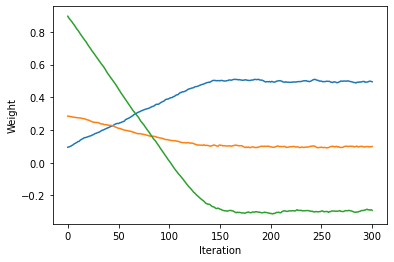

In [7]:
def plot_weights(ws):
    ax = plt.plot(ws);
    plt.xlabel('Iteration')
    plt.ylabel('Weight');

plot_weights(ws)

In [1]:
import numpy as np
from math import cos, pi
import matplotlib.pyplot as plt
import random
from random import randint
from tqdm import tqdm
import os



class NES:
    def __init__(self):
        super().__init__()

        # Initialize mean and standard deviation
        #self.theta_mean = np.zeros((n_samples, dim_theta))
        self.theta_mean  = np.random.uniform(min_val, max_val, (n_samples, dim_theta))
        self.theta_std = np.random.uniform(max_val-1, max_val, (n_samples, dim_theta))
        self.n_samples = n_samples
        self.t = n_iterations
        self.top_p = top_p
        self.fit_gaussian()

    def fit_gaussian(self):
        # theta is actualy the population sampled from the distribution
        self.theta = np.random.normal(self.theta_mean, self.theta_std)
        #self.theta = np.clip(theta, min_val, max_val)

        

    def generation(self, function=0):
        # Sample n_sample candidates from N(theta)
        mean_fitness = []
        best_fitness = []
        worst_fitness = []
        I = np.identity(dim_theta*2)
        for i in tqdm(range(0, self.t)):
            #0 --> Sphere; 1 --> Rasti
            fitness = self.evaluate_fitness(self.theta, function)

            mean_fitness.append(np.mean(fitness))
            best_fitness.append(np.min(fitness))
            worst_fitness .append(np.max(fitness))

            
            if plot == 1:
                self.plot_candidates(self.theta, function, min_val, max_val)
                plt.pause(pause)


            # Compute the two gradient separately 
            Dlog_mean = self.compute_mean_grad(self.theta)
            Dlog_std = self.compute_std_grad(self.theta)

            Dlog = np.concatenate((Dlog_mean, Dlog_std), axis=1)

            Dj = np.mean(Dlog * np.array([fitness]).T, axis=0)

            F = np.zeros((Dlog.shape[1], Dlog.shape[1]))
        
            for i in range(Dlog.shape[0]):
                F = F + np.outer(Dlog[i,:], Dlog[i,:])
            
            F = F / self.n_samples
            F = F + I * 1e-5

            theta = np.concatenate((self.theta_mean, self.theta_std), axis=1)

            Theta = theta - alpha * np.dot(np.linalg.inv(F), Dj)

            self.theta_mean = Theta[:, :int(Theta.shape[1]/2)]
            self.theta_std = Theta[:, int(Theta.shape[1]/2):]
            self.fit_gaussian()

            if plot == 1:
                plt.close("all")
        if plot == 1:        
            plt.show()


        print("mean fitness level")
        print(mean_fitness)


        plt.plot(mean_fitness)
        plt.show()

        return mean_fitness, best_fitness, worst_fitness
        
        




    def compute_mean_grad(self, e_candidates):
        eps = 1e-6
        N = e_candidates - self.theta_mean
        D = self.theta_std ** 2
        return N/D

    def compute_std_grad(self, e_candidates):
        eps = 1e-6
        N = (e_candidates - self.theta_mean)**2 - self.theta_std**2
        D = self.theta_std ** 3
        return N/D


    def evaluate_fitness(self, candidates, func=0):
        if func == 0:
            return SphereFunction(candidates)
        else:
            return rastriginFunction(candidates)

    def plot_candidates(self, candidates, func=0, min_val=-5, max_val=5):

        if func == 0:
            plot_visualize_sphere(1000, candidates, min_val, max_val)
        else:
            plot_visualize_rastrigin(1000, candidates, min_val, max_val)


In [ ]:
def run(alg="CEM", function = 0):
    if alg == "CEM":
        cem = CEM()
        m, b, w = cem.generation(function)
    if alg == "NES":
        nes = NES()
        m, b, w = nes.generation(function)
    if alg == "CMA_ES":
        cma = CMA_ES()
        m, b, w = cma.generation(function)

    return m, b, w


# number of dimensions
dim_theta = 100

# learning rate of NES
alpha = 1e-3

# Population Size
n_samples = 1000

# Elite ratio percentage
top_p = 20

# Number of Generations
n_iterations = 1000

# Range of values
min_val = -5
max_val = 5

# Plot or not (0 = False, 1 = True)
plot = 0

# Number of Runs
runs = 3

# Algorithm to run in { CEM, NES, CMA_ES }
algorithm = "NES"

# Evaluation function ( 0 = Sphere, 1 = Rastrigin)
function = 0

# Plot output frequency
pause = 0.01

mean = []
best = []
worst = []

# Plot samples on contour plot
generateSamples(min_val = min_val, max_val = max_val)

# Run the algorithm runs times and save the results
for i in range(runs):
    m, b, w = run(alg=algorithm, function=function)
    mean.append(m)
    best.append(b)
    worst.append(w)

# Compute the mean over the runs
mean_3 = np.mean(mean, axis=0)
best_3 = np.mean(best, axis=0)
worst_3 = np.mean(worst, axis=0)

# Plot the data
#plt.plot(mean_3, label='mean')
plt.plot(best_3, 'g', label='best')
plt.plot(worst_3, 'r', label='worst')
plt.legend(loc='upper right')
plt.show()


# Save data
np.save(directory + "/" + algorithm + "_" + "mean"  + "_" + str(dim_theta) + "_" + str(n_samples) + "_" + str(n_iterations) + "_" + str(top_p) + "_" + str(alpha), mean_3)
np.save(directory + "/" + algorithm + "_" + "best" + "_" + str(dim_theta) + "_" + str(n_samples) + "_" + str(n_iterations) + "_" + str(top_p) + "_" + str(alpha), best_3)
np.save(directory + "/" + algorithm + "_" + "worst" + "_" + str(dim_theta) + "_" + str(n_samples) + "_" + str(n_iterations) + "_" + str(top_p) + "_" + str(alpha), worst_3)